In [2]:
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score as ars
import pandas as pd
import numpy as np
from scipy.io import arff
from sklearn.mixture import GaussianMixture
import warnings
import glob
import cv2
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import skfuzzy as fuzz
import os
from copy import deepcopy
from sklearn import preprocessing

In [5]:
cwd=os.getcwd()
datasets=os.listdir(cwd+"\\literature\\")

In [6]:

thresh=0.2
limit=20

Started for Dataset = Glass


For K = 2




Average Weighted Rand Score = -0.021547751536246544 for i = 1
Average Weighted Silhouette Score = 0.17368483618523725 for i = 1
(array([b"'no'", b"'yes'"], dtype=object), array([205,   9], dtype=int64))
(array([0, 1], dtype=int64), array([175,  39], dtype=int64))
----------------------------------------------------------------------------------------

Average Weighted Rand Score = 0.04517345335654534 for i = 2
Average Weighted Silhouette Score = 0.03646847117377548 for i = 2
(array([b"'no'", b"'yes'"], dtype=object), array([205,   9], dtype=int64))
(array([0, 1], dtype=int64), array([ 69, 145], dtype=int64))
----------------------------------------------------------------------------------------

Average Weighted Rand Score = -0.0546244461222821 for i = 3
Average Weighted Silhouette Score = 0.7554516495953725 for i = 3
(array([b"'no'", b"'yes'"], dtype=object), array([205,   9], dtype=int64))
(array([0, 1], dtype=int64), array([ 28, 186], dty

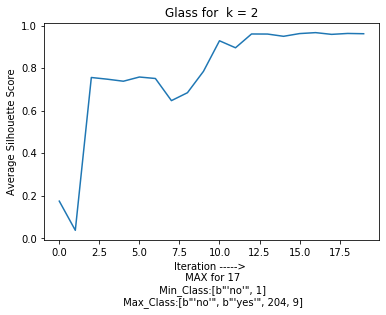

------------------------------------------------------------------------------------------------------






In [7]:

DataSet='Glass'
j=DataSet


path=cwd+"\\literature\\"+DataSet+"\\"+DataSet+"_withoutdupl_norm.arff"
#path_img= "C:\\Users\\soumy\\Desktop\\JU\Data for Outlier\\Data for Outlier\\001\\"
data = arff.loadarff(path)

print('Started for Dataset = '+j+'\n\n' )
dict1={}
dictoutlier={}
dictfinal={}
dictcenters={}
dictnotoutlier={}
df12=pd.DataFrame(data[0])
#df=df[df['class']=='C001']

df_copy=deepcopy(df12)
labelsss=df12['outlier']
df12.drop(columns=['outlier','id'],inplace=True)


x = df12.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df12 = pd.DataFrame(x_scaled)
pd.set_option('use_inf_as_na', True)
columns=df12.columns
df=df12

k=2
silhouette=[]
rand=[]
print('For K = '+str(k))
print('\n\n\n')
for i in range(limit):
    df.replace([np.inf, -np.inf], np.nan)
    df.dropna(inplace=True)
    df=df.reset_index()
    df.drop(columns='index',inplace=True)

    gmmkpp = GaussianMixture(n_components=k,random_state=100).fit(df)
    gmmkm = GaussianMixture(init_params='random',n_components=k,random_state=100).fit(df)
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(df.T, k, 2, error=0.005, maxiter=1000, init=None)

    labelskmpp = gmmkpp.predict_proba(df)
    
    labelskm = gmmkm.predict_proba(df)

    ##Rand Index
    #s1=ars(labelsss,np.argmax(labelskmpp,axis=1))
    #s2=ars(labelsss, np.argmax(labelskm,axis=1))
    #s3=ars(labelsss, np.argmax(u,axis=0))

    #print('Rand Score for KMEANS++ = '+str(s1))
    #print('Rand Score for KMEANS = '+str(s2))
    #print('Rand Score for CMEANS = '+str(s3))
    #s1=abs(s1)
    #s2=abs(s2)
    #s3=abs(s3)
    
    
    
    
    # Silhouette Score
    s1=silhouette_score(df, np.argmax(labelskmpp,axis=1))
    s2=silhouette_score(df, np.argmax(labelskm,axis=1))
    s3=silhouette_score(df, np.argmax(u,axis=0))
    #print('Silhouette Score for KMEANS++ = '+str(s1))
    #print('Silhouette Score for KMEANS = '+str(s2))
    #print('Silhouette Score for CMEANS = '+str(s3))
    s1=abs(s1)
    s2=abs(s2)
    s3=abs(s3)
    
    


    y_net = s1*labelskmpp  +  s3*u.T

    #print(y_net)
    ################## SCORE #######################
    silhouette_avg = silhouette_score(df, np.argmax(y_net,axis=1))
    rand_avg = ars(labelsss,np.argmax(y_net,axis=1))
    print('Average Weighted Rand Score =',rand_avg,'for i =',i+1)
    print('Average Weighted Silhouette Score =',silhouette_avg,'for i =',i+1)
    silhouette.append(silhouette_avg)
    rand.append(rand_avg)
    ############### OUTLIER ########################
    if(i==0):
        outliers=np.where(np.max(y_net,axis=1) < thresh)
    else :
        thresh=thresh
        outliers=np.where(np.max(y_net,axis=1) < thresh)
    #if(len(outliers[0])==0):
        #print('All Outliers Removed.... Breaking')
        #break
    #print(outliers[0])
    dict1.update({i:outliers[0]})
    mol=np.delete(y_net,outliers[0],axis=0)
    y_net=mol
    df=df.drop(outliers[0])
    df=df.reset_index()
    df.drop(columns='index',inplace=True)
    ylabel=np.argmax(y_net,axis=1)


    labels=pd.Series(ylabel,name="Labels")


    print(np.unique(labelsss,return_counts=True))

    print(np.unique(labels,return_counts=True))
    df=df.join(labels)

    df.update(labels)

    dictoutlier.update({i:list(df[df['Labels']==np.unique(labels,return_counts=True)[1].argmin()].index)})
    dictnotoutlier.update({i:list(df[df['Labels']==np.unique(labels,return_counts=True)[1].argmax()].index)})

    centroids=df.groupby('Labels', as_index=False)[columns].mean()
    lol=df['Labels']

    centroids=centroids.drop(columns='Labels')
    centroids=centroids.values.tolist()
    dictcenters.update({i:centroids[np.unique(labels,return_counts=True)[1].argmax()]})
    #print(centroids)
    #print('---')
    for i1 in range(k):
            x = 0
            y = 0
            for j1 in range(len(columns)):
                x+=np.sqrt(np.abs((df[columns[j1]] - centroids[i1][j1]) ** 2))
            y=np.exp(-1*x)   
            # sqrt((x1 - x2)^2 - (y1 - y2)^2)
            df['distance_from_{}'.format(i1)] =x
            df['Probability_of_{}'.format(i1)]=y



    for j2 in range(k):
        df1=df[df['Labels']==j2]
        for i2 in columns:
            df1[i2]=df[i2]*np.abs(df1['Probability_of_{}'.format(j2)]/df1['distance_from_{}'.format(j2)])
            #print(df1.head())
            df.update(df1[i2])

    df=df[columns]

    #print(df.head(2))
    print('----------------------------------------------------------------------------------------')
    print()



m=np.argmax(silhouette)

#print('Best for m='+str(m+1)+' >=> '+ str(max(silhouette)))



for j1 in range(len(columns)):
    x+=np.sqrt(np.abs((df12[columns[j1]] - dictcenters[m][j1]) ** 2))
outliers={}
nonoutliers={}
for po in range(5):
    outliers.update({po:np.where(x>=(x.mean()+po))})
    nonoutliers.update({po:np.where(x<(x.mean()+po))})
    #print(x.max()-po)
print('--------------------------------------------------')
print('Final Decision Making')
for i in outliers:
    foo=[]
    bar=[]
    for j in outliers[i]:
           foo.append(labelsss[j])
    #print('Outliers:-[False Outliers   True Outliers]')
    if (len(foo[0])>0):
        noo=np.unique(foo,return_counts=True)[1][0]
        if(np.unique(foo,return_counts=True)[0].shape[0]==2):
            yeso=np.unique(foo,return_counts=True)[1][1]
        else:
            yeso=0
    else:
        noo=np.unique(foo,return_counts=True)[0]
        yeso=np.unique(foo,return_counts=True)[0]
        #print(str()+' for radius = '+str(x.mean()+i))
    #print('-------------------------------------------------------')
    for j in nonoutliers[i]:
        bar.append(labelsss[j])
    non=np.unique(bar,return_counts=True)[1][0]
    if(np.unique(bar,return_counts=True)[0].shape[0]==2):
        yesn=np.unique(bar,return_counts=True)[1][1]
    else:
        yesn=0
    print('Radius = '+str(x.mean()+i))
    print('Non-Outliers:-True Non-Outliers = '+str(non)+'\n'+   'False Non-Outliers = '+str(yesn)+'\n')
    print('Outliers:-False Outliers = '+str(noo)+'\n'+   'True Outliers = '+str(yeso)+'\n')
    
    print('Precision for radius = '+str(x.mean()+i)+'is = '+str(yeso/(yeso+noo)))
    #print(str(np.unique(bar,return_counts=True))+' for radius = '+str(x.mean()+i))
    print('==================================================================\n')
        
    
    





z=[]
y1=[]
for i in dictoutlier[m]:
    z.append(labelsss[i])

fooo=np.unique(z,return_counts=True)
z=str(list(fooo[0])+list(fooo[1]))


for i in dictnotoutlier[m]:
    y1.append(labelsss[i])

foobaro=np.unique(y1,return_counts=True)
y1=str(list(foobaro[0])+list(foobaro[1]))


fig=plt.figure()
f=plt.plot(silhouette)
plt.title(DataSet+' for  k = '+ str(k) )
plt.xlabel("Iteration -----> \n MAX for "+str(m+1)+"\n Min_Class:"+z+"\n Max_Class:"+y1)
plt.ylabel("Average Silhouette Score")

plt.savefig(cwd+'\\Results\\Graphs'+DataSet+' for k = '+str(k)+'.png',bbox_inches='tight')  
plt.show()
print('------------------------------------------------------------------------------------------------------')
print('\n')
print('\n')

In [14]:
i,k=np.unique(bar,return_counts=True)

In [17]:
list(k)

[205, 9]

In [ ]:
outliers={}
for po in range(5):
    
    outliers.update({po:np.where(x>=(x.mean()+po))})
    #print(x.max()-po)

for i in outliers:
    foo=[]
    for j in outliers[i]:
           foo.append(labelsss[j])
    print(str(np.unique(foo,return_counts=True)[1])+' for radius = '+str(x.mean()+i))
    
    

In [ ]:
len(dictcenters[m])

In [ ]:
dictcenters[m]